In [1]:
cd("..")
include("full_scene.jl")
trajdata = Trajdata(1)
nothing

    .==(AbstractArray{Bool, N<:Any}, Union{DataArrays.DataArray{Bool, N<:Any}, DataArrays.PooledDataArray{Bool, R<:Integer, N<:Any}}) at /home/tim/.julia/v0.4/DataArrays/src/broadcast.jl:330
is ambiguous with: 
    .==(Images.AbstractImageDirect{Bool, N<:Any}, AbstractArray{Bool, N<:Any}) at /home/tim/.julia/v0.4/Images/src/algorithms.jl:181.
To fix, define 
    .==(Images.AbstractImageDirect{Bool, N<:Any}, Union{DataArrays.DataArray{Bool, N<:Any}, DataArrays.PooledDataArray{Bool, R<:Integer, N<:Any}})
before the new definition.
    .==(AbstractArray, Union{DataArrays.PooledDataArray, DataArrays.DataArray}) at /home/tim/.julia/v0.4/DataArrays/src/broadcast.jl:285
is ambiguous with: 
    .==(Images.AbstractImageDirect{Bool, N<:Any}, AbstractArray{Bool, N<:Any}) at /home/tim/.julia/v0.4/Images/src/algorithms.jl:181.
To fix, define 
    .==(Images.AbstractImageDirect{Bool, N<:Any}, Union{DataArrays.PooledDataArray{Bool, R<:Integer, N<:Any}, DataArrays.DataArray{Bool, N<:Any}})
before the 

loading from file: elapsed time: 15.475533604 seconds


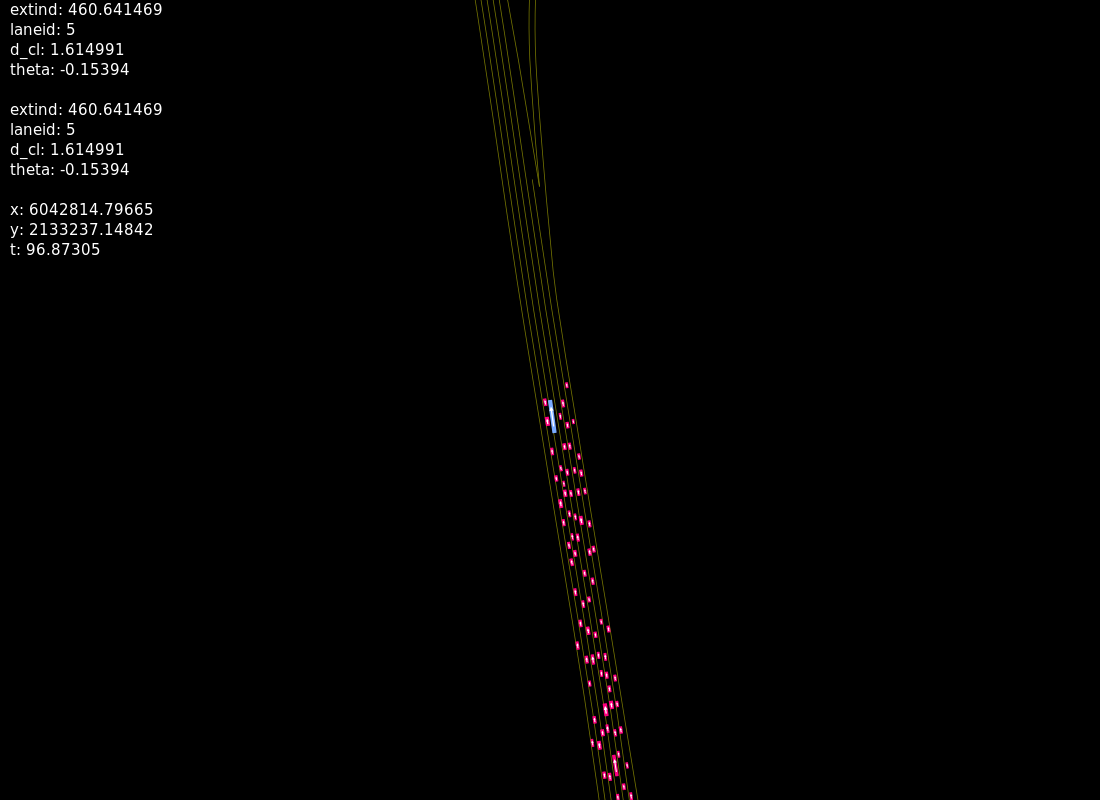

In [4]:
include("full_scene.jl")

frame = 4000
offset_x = -30
offset_y = -380
offset_rot = -3.5

extractor = Scene()

# @manipulate for frame in 1:nframes(trajdata), offset_x in -500:10:500, offset_y in -500:10:800, offset_rot in -90:0.5:90
    
    scene_extract = SceneExtractParams(VecSE2(6042807.824+offset_x, 2133582.509+offset_y, deg2rad(100+offset_rot)), 300.0)
    scene_extract_80A = scene_extract

    scene = pull_subscene(trajdata, frame, scene_extract, extractor)
    overlays = Overlay[SceneBox(scene_extract)]
    carid = first_carid(trajdata, frame)
    if carid != 0
        push!(overlays, FrenetDisplay(scene.vehicles[1].id))
    end

    render_scene!(trajdata, frame, carid, camerazoom=0.5, overlays=overlays) 
# end

Interact.Slider{Int64}(Signal{Int64}(5008, nactions=0),"frame",5008,1:10016,true)

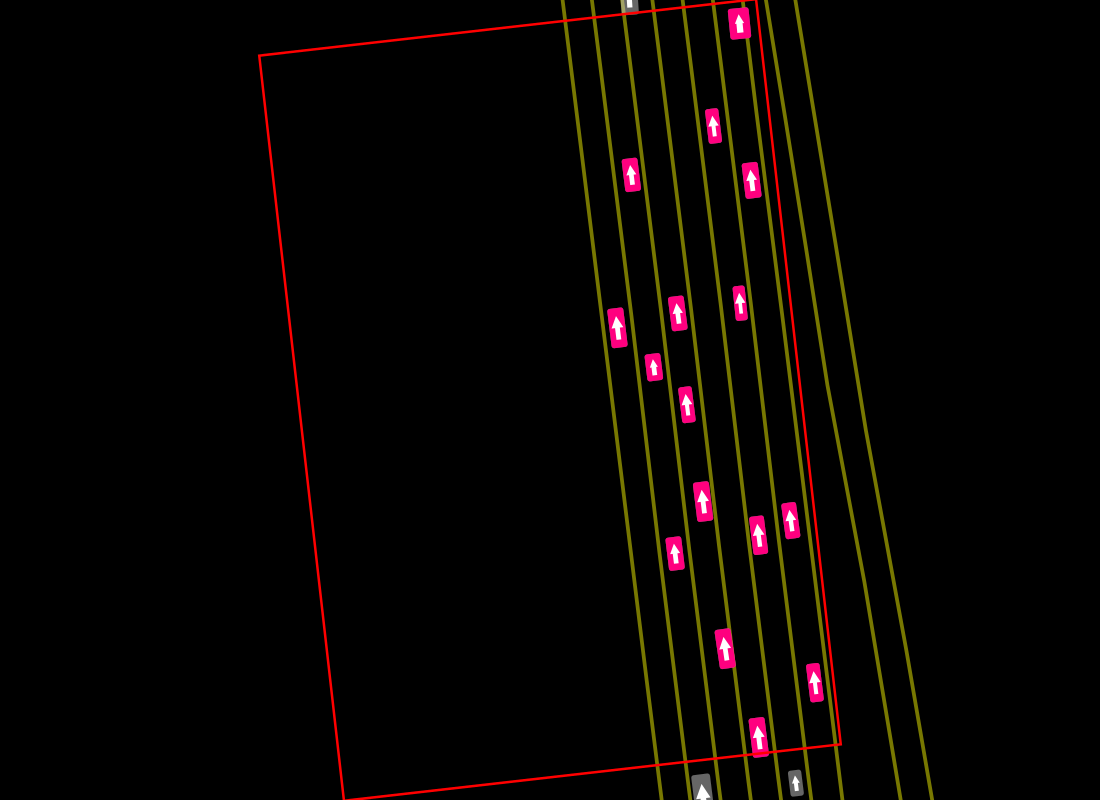

In [2]:
include("full_scene.jl")

scene_extract = REGIONS["80A"]

extractor = Scene()
overlays = Overlay[SceneBox(scene_extract)]

@manipulate for frame in 1:nframes(trajdata)
    render_scene!(trajdata, frame, scene_extract, extractor, camerazoom=2.5, overlays=overlays)
end

# Visualize SubScene Structures

Interact.Slider{Int64}(Signal{Int64}(5008, nactions=0),"frame",5008,1:10016,true)

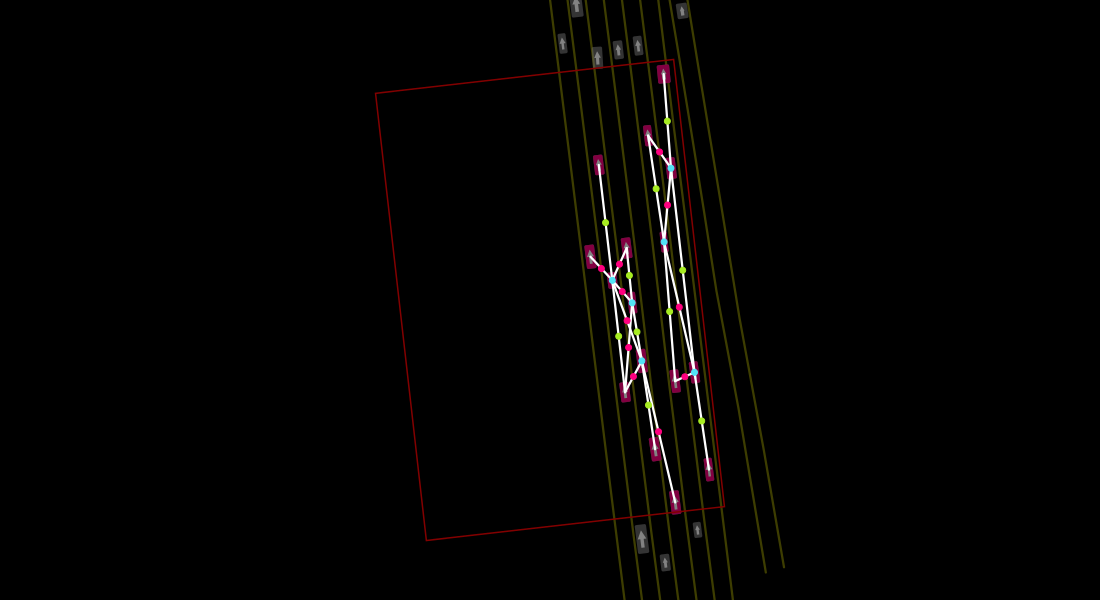

In [3]:
include("full_scene.jl")

factors = create_core_factors()
overlays = Overlay[
            SceneBox(scene_extract),
            Overwash(RGBA(0.0,0.0,0.0,0.7)),
            SceneStructureOverlay(scene_extract, extractor, factors)]

@manipulate for frame in 1:nframes(trajdata)
    render_scene!(trajdata, frame, scene_extract, extractor, camerazoom=1.5, overlays=overlays, canvas_height=600)
end
# function draw(t, dt)
#     frame = ceil(Int, t*30) + 5100
#     render_scene!(trajdata, frame, scene_extract, extractor, camerazoom=1.5, overlays=overlays, canvas_height=600)
# end
# film = roll(draw, fps=30, duration=4)
# write("structure.gif", film) # Write to a gif file
# film

# Pull the SubScene Dataset

In [1]:
cd("..")
include("full_scene.jl")

    .-(AbstractArray, Union{DataArrays.DataArray, DataArrays.PooledDataArray}) at /home/tim/.julia/v0.4/DataArrays/src/broadcast.jl:285
is ambiguous with: 
    .-(Images.AbstractImageDirect, AbstractArray) at /home/tim/.julia/v0.4/Images/src/algorithms.jl:40.
To fix, define 
    .-(Images.AbstractImageDirect, Union{DataArrays.DataArray, DataArrays.PooledDataArray})
before the new definition.
    .==(AbstractArray{Bool, N<:Any}, Union{DataArrays.PooledDataArray{Bool, R<:Integer, N<:Any}, DataArrays.DataArray{Bool, N<:Any}}) at /home/tim/.julia/v0.4/DataArrays/src/broadcast.jl:330
is ambiguous with: 
    .==(Images.AbstractImageDirect{Bool, N<:Any}, AbstractArray{Bool, N<:Any}) at /home/tim/.julia/v0.4/Images/src/algorithms.jl:181.
To fix, define 
    .==(Images.AbstractImageDirect{Bool, N<:Any}, Union{DataArrays.PooledDataArray{Bool, R<:Integer, N<:Any}, DataArrays.DataArray{Bool, N<:Any}})
before the new definition.
    .==(AbstractArray, Union{DataArrays.DataArray, DataArrays.PooledDa

plot_convergence (generic function with 1 method)

In [2]:
include("full_scene.jl")

tic()
dsetexp = pull_exportable_subscene_dataset() # max_sample_size_per_trajdata=5
toc()

println("nscenes: ", length(dsetexp.scenes))
println("nvehstates: ", length(dsetexp.states))
    
println("SAVING")
tic()
JLD.save("output/dsetexport.jld", "dsetexp", dsetexp, "time", now())
toc()

"DONE"

loading from file: elapsed time: 

20.968379718 seconds
pulling scenes for 80A
elapsed time: 8.567283591 seconds
pulling scenes for 80B
elapsed time: 9.104990704 seconds
loading from file: elapsed time: 21.559357743 seconds
pulling scenes for 80A
elapsed time: 9.860916219 seconds
pulling scenes for 80B
elapsed time: 10.807223543 seconds
loading from file: elapsed time: 24.146762554 seconds
pulling scenes for 80A
elapsed time: 10.134811749 seconds
pulling scenes for 80B
elapsed time: 9.820383387 seconds
loading from file: elapsed time: 16.672441028 seconds
pulling scenes for 80A
elapsed time: 0.02668187 seconds
pulling scenes for 101B
elapsed time: 10.458639191 seconds
pulling scenes for 101A
elapsed time: 9.498101226 seconds
pulling scenes for 80B
elapsed time: 0.014306657 seconds
pulling scenes for 101C
elapsed time: 11.193774078 seconds
loading from file: elapsed time: 19.458351928 seconds
pulling scenes for 80A
elapsed time: 0.028250842 seconds
pulling scenes for 101B
elapsed time: 14.302613355 seconds
pulling scenes

"DONE"